<a href="https://colab.research.google.com/github/Balajinanda/Datascience-Project/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
# Necessary Libraries
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Loading the data**

In [3]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the path to the uploaded zip file and extraction directory
zip_file_path = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset.zip'
extract_dir = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [5]:
# List the contents of the extracted directory to explore its structure
PAMAP2_dataset_path = os.path.join(extract_dir, 'PAMAP2_Dataset')
dataset_contents = os.listdir(PAMAP2_dataset_path)
dataset_contents

['Protocol',
 'Optional',
 'subjectInformation.pdf',
 'DescriptionOfActivities.pdf',
 'DataCollectionProtocol.pdf',
 'PerformedActivitiesSummary.pdf',
 'readme.pdf']

In [6]:
# List the contents of the 'dataset' folder
dataset_folder_path = os.path.join(PAMAP2_dataset_path, 'Protocol')
dataset_files = os.listdir(dataset_folder_path)
dataset_files

['subject101.dat',
 'subject102.dat',
 'subject103.dat',
 'subject104.dat',
 'subject105.dat',
 'subject106.dat',
 'subject107.dat',
 'subject108.dat',
 'subject109.dat']

# **Dataset preparation**

In [7]:
# Path to the dataset directory
data_path = "/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset/PAMAP2_Dataset/Protocol"

# Define column names based on dataset documentation
columns = ['timestamp', 'activity_id', 'heart_rate'] + [
    # IMU1 (Hand)
    'hand_temperature',
    'hand_accel_16g_X', 'hand_accel_16g_Y', 'hand_accel_16g_Z',
    'hand_accel_6g_X', 'hand_accel_6g_Y', 'hand_accel_6g_Z',
    'hand_gyro_X', 'hand_gyro_Y', 'hand_gyro_Z',
    'hand_magnet_X', 'hand_magnet_Y', 'hand_magnet_Z',
    'hand_orientation_1', 'hand_orientation_2', 'hand_orientation_3', 'hand_orientation_4',
    # IMU2 (Chest)
    'chest_temperature',
    'chest_accel_16g_X', 'chest_accel_16g_Y', 'chest_accel_16g_Z',
    'chest_accel_6g_X', 'chest_accel_6g_Y', 'chest_accel_6g_Z',
    'chest_gyro_X', 'chest_gyro_Y', 'chest_gyro_Z',
    'chest_magnet_X', 'chest_magnet_Y', 'chest_magnet_Z',
    'chest_orientation_1', 'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
    # IMU3 (Ankle)
    'ankle_temperature',
    'ankle_accel_16g_X', 'ankle_accel_16g_Y', 'ankle_accel_16g_Z',
    'ankle_accel_6g_X', 'ankle_accel_6g_Y', 'ankle_accel_6g_Z',
    'ankle_gyro_X', 'ankle_gyro_Y', 'ankle_gyro_Z',
    'ankle_magnet_X', 'ankle_magnet_Y', 'ankle_magnet_Z',
    'ankle_orientation_1', 'ankle_orientation_2', 'ankle_orientation_3', 'ankle_orientation_4',
]

In [8]:
# Function to load and combine all .dat files
def load_and_combine_data(path):
    combined_data = []
    for file in os.listdir(path):
        if file.endswith(".dat"):
            subject_id = int(file.split('.')[0][-3:])  # Extract subject ID from file name
            file_path = os.path.join(path, file)
            subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
            subject_data['subject_id'] = subject_id  # Add subject ID column
            combined_data.append(subject_data)
    return pd.concat(combined_data, ignore_index=True)

# Load all data files
data = load_and_combine_data(data_path)

<ipython-input-8-988b175ed20e>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
<ipython-input-8-988b175ed20e>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
<ipython-input-8-988b175ed20e>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
<ipython-input-8-988b175ed20e>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.rea

In [9]:
data.head()

,timestamp,activity_id,heart_rate,hand_temperature,hand_accel_16g_X,hand_accel_16g_Y,hand_accel_16g_Z,hand_accel_6g_X,hand_accel_6g_Y,hand_accel_6g_Z,...,ankle_gyro_Y,ankle_gyro_Z,ankle_magnet_X,ankle_magnet_Y,ankle_magnet_Z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


In [10]:
print("Combined Data Shape:", data.shape)

Combined Data Shape: (2872533, 55)


In [11]:
# Fill missing values with forward fill followed by backward fill
data = data.interpolate().fillna(method='bfill').fillna(method='ffill')

<ipython-input-11-d03360a9ba79>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate().fillna(method='bfill').fillna(method='ffill')


In [12]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 timestamp              0
activity_id            0
heart_rate             0
hand_temperature       0
hand_accel_16g_X       0
hand_accel_16g_Y       0
hand_accel_16g_Z       0
hand_accel_6g_X        0
hand_accel_6g_Y        0
hand_accel_6g_Z        0
hand_gyro_X            0
hand_gyro_Y            0
hand_gyro_Z            0
hand_magnet_X          0
hand_magnet_Y          0
hand_magnet_Z          0
hand_orientation_1     0
hand_orientation_2     0
hand_orientation_3     0
hand_orientation_4     0
chest_temperature      0
chest_accel_16g_X      0
chest_accel_16g_Y      0
chest_accel_16g_Z      0
chest_accel_6g_X       0
chest_accel_6g_Y       0
chest_accel_6g_Z       0
chest_gyro_X           0
chest_gyro_Y           0
chest_gyro_Z           0
chest_magnet_X         0
chest_magnet_Y         0
chest_magnet_Z         0
chest_orientation_1    0
chest_orientation_2    0
chest_orientation_3    0
chest_orientation_4    0
ankle_temperature      0
ankle_accel_16g_X      0
ankle_ac

In [13]:
sensor_columns = data.columns[3:-1]
scaler = MinMaxScaler()
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])

In [14]:
# Activity mapping from the README file
activity_map = {
    1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking',
    5: 'running', 6: 'cycling', 7: 'Nordic walking', 9: 'watching TV',
    10: 'computer work', 11: 'car driving', 12: 'ascending stairs',
    13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing',
    18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer',
    24: 'rope jumping'
}
data['activity_name'] = data['activity_id'].map(activity_map)
print(data['activity_name'].value_counts())

activity_name
walking              238761
ironing              238690
lying                192523
standing             189931
Nordic walking       188107
sitting              185188
vacuum cleaning      175353
cycling              164600
ascending stairs     117216
descending stairs    104944
running               98199
rope jumping          49360
Name: count, dtype: int64


# **Exploratory Data Analysis(EDA)**

In [15]:
# Basic Data Overview
print("Columns:", data.columns)

Columns: Index(['timestamp', 'activity_id', 'heart_rate', 'hand_temperature',
       'hand_accel_16g_X', 'hand_accel_16g_Y', 'hand_accel_16g_Z',
       'hand_accel_6g_X', 'hand_accel_6g_Y', 'hand_accel_6g_Z', 'hand_gyro_X',
       'hand_gyro_Y', 'hand_gyro_Z', 'hand_magnet_X', 'hand_magnet_Y',
       'hand_magnet_Z', 'hand_orientation_1', 'hand_orientation_2',
       'hand_orientation_3', 'hand_orientation_4', 'chest_temperature',
       'chest_accel_16g_X', 'chest_accel_16g_Y', 'chest_accel_16g_Z',
       'chest_accel_6g_X', 'chest_accel_6g_Y', 'chest_accel_6g_Z',
       'chest_gyro_X', 'chest_gyro_Y', 'chest_gyro_Z', 'chest_magnet_X',
       'chest_magnet_Y', 'chest_magnet_Z', 'chest_orientation_1',
       'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
       'ankle_temperature', 'ankle_accel_16g_X', 'ankle_accel_16g_Y',
       'ankle_accel_16g_Z', 'ankle_accel_6g_X', 'ankle_accel_6g_Y',
       'ankle_accel_6g_Z', 'ankle_gyro_X', 'ankle_gyro_Y', 'ankle_gyro_Z',


In [16]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
          timestamp   activity_id    heart_rate  hand_temperature  \
count  2.872533e+06  2.872533e+06  2.872533e+06      2.872533e+06   
mean   1.834354e+03  5.466243e+00  1.098822e+02      7.346900e-01   
std    1.105689e+03  6.331333e+00  2.587853e+01      1.716669e-01   
min    5.640000e+00  0.000000e+00  5.700000e+01      0.000000e+00   
25%    8.931600e+02  0.000000e+00  9.000000e+01      6.220930e-01   
50%    1.790830e+03  3.000000e+00  1.080000e+02      7.790698e-01   
75%    2.710570e+03  7.000000e+00  1.254545e+02      8.604651e-01   
max    4.475630e+03  2.400000e+01  2.020000e+02      1.000000e+00   

       hand_accel_16g_X  hand_accel_16g_Y  hand_accel_16g_Z  hand_accel_6g_X  \
count      2.872533e+06      2.872533e+06      2.872533e+06     2.872533e+06   
mean       6.742471e-01      4.149587e-01      4.035947e-01     4.950500e-01   
std        2.877560e-02      2.417402e-02      1.481958e-02     5.248684e-02   
min        0.000000e+00      0.000000e

<ipython-input-17-cd898954cb12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity_name', data=data, palette="viridis", order=data['activity_name'].value_counts().index)


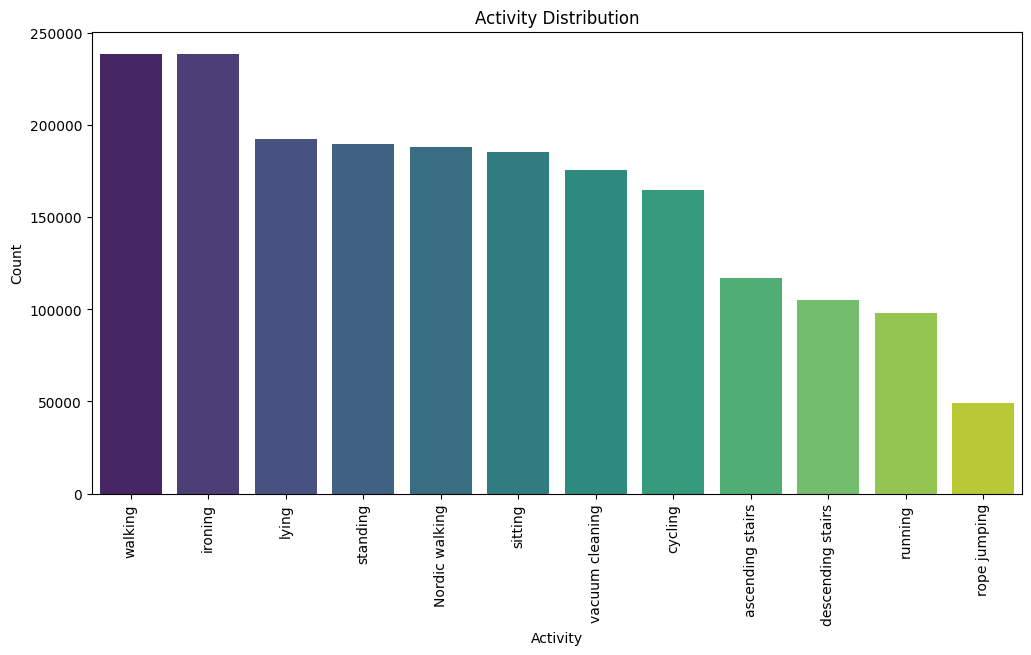

In [17]:
# Activity distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='activity_name', data=data, palette="viridis", order=data['activity_name'].value_counts().index)
plt.title("Activity Distribution")
plt.xticks(rotation=90)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.show()

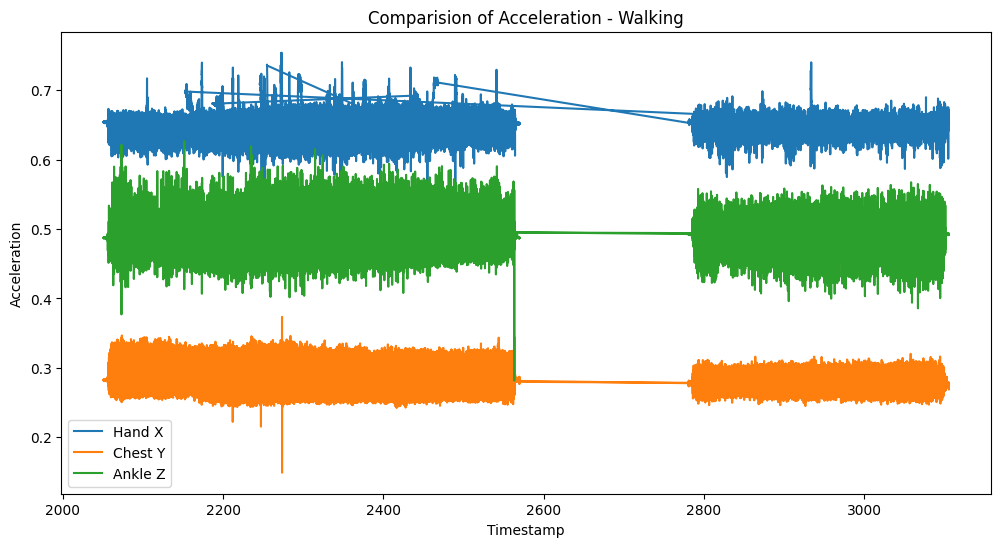

In [18]:
# Plot sensor readings for a specific activity (e.g., walking)
activity_data = data[data['activity_id'] == 4]
plt.figure(figsize=(12, 6))
plt.plot(activity_data['timestamp'], activity_data['hand_accel_16g_X'], label='Hand X')
plt.plot(activity_data['timestamp'], activity_data['chest_accel_16g_Y'], label='Chest Y')
plt.plot(activity_data['timestamp'], activity_data['ankle_accel_16g_Z'], label='Ankle Z')
plt.legend()
plt.title("Comparision of Acceleration - Walking")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration")
plt.show()

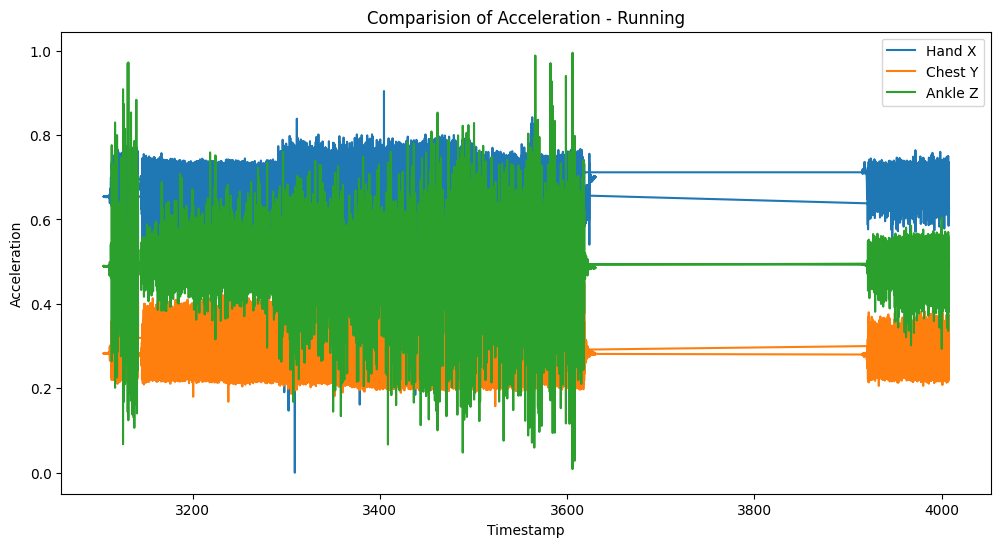

In [19]:
# Plot sensor readings for a specific activity (e.g., running)
activity_data = data[data['activity_id'] == 5]
plt.figure(figsize=(12, 6))
plt.plot(activity_data['timestamp'], activity_data['hand_accel_16g_X'], label='Hand X')
plt.plot(activity_data['timestamp'], activity_data['chest_accel_16g_Y'], label='Chest Y')
plt.plot(activity_data['timestamp'], activity_data['ankle_accel_16g_Z'], label='Ankle Z')
plt.legend()
plt.title("Comparision of Acceleration - Running")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration")
plt.show()

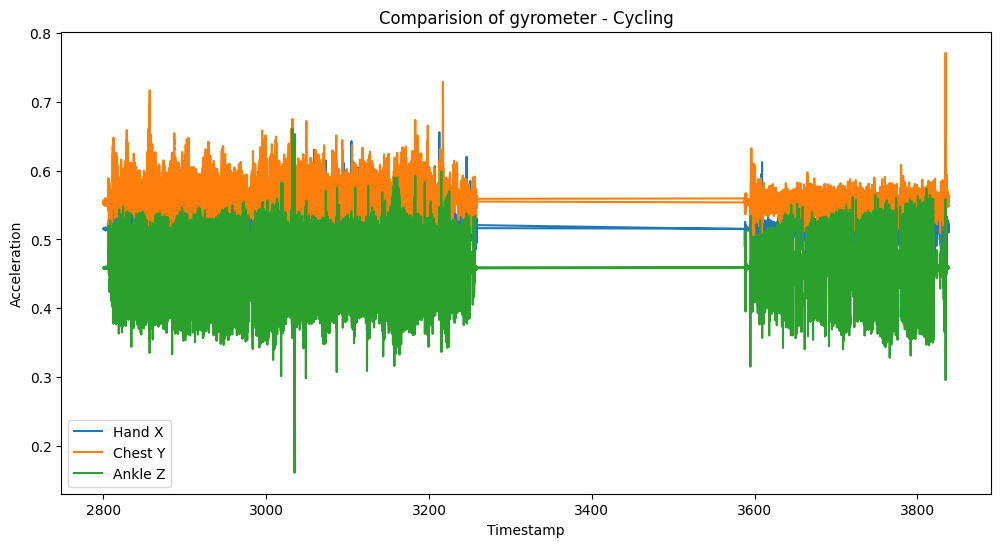

In [20]:
# Plot sensor readings for a specific activity (e.g., cycling)
activity_data = data[data['activity_id'] == 6]
plt.figure(figsize=(12, 6))
plt.plot(activity_data['timestamp'], activity_data['hand_gyro_X'], label='Hand X')
plt.plot(activity_data['timestamp'], activity_data['chest_gyro_Y'], label='Chest Y')
plt.plot(activity_data['timestamp'], activity_data['ankle_gyro_Z'], label='Ankle Z')
plt.legend()
plt.title("Comparision of gyrometer - Cycling")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration")
plt.show()

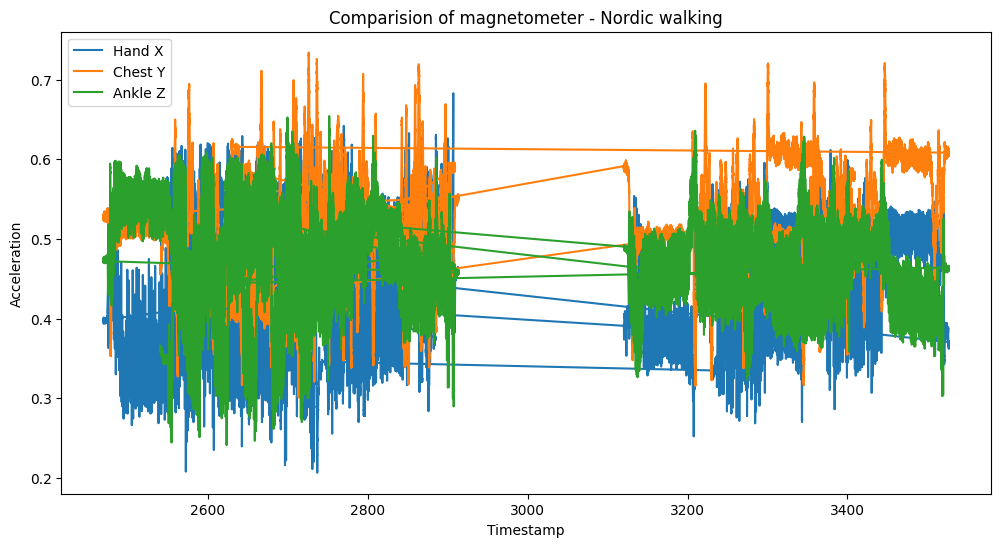

In [21]:
# Plot sensor readings for a specific activity (e.g., Nordic walking)
activity_data = data[data['activity_id'] == 7]
plt.figure(figsize=(12, 6))
plt.plot(activity_data['timestamp'], activity_data['hand_magnet_X'], label='Hand X')
plt.plot(activity_data['timestamp'], activity_data['chest_magnet_Y'], label='Chest Y')
plt.plot(activity_data['timestamp'], activity_data['ankle_magnet_Z'], label='Ankle Z')
plt.legend()
plt.title("Comparision of magnetometer - Nordic walking")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration")
plt.show()

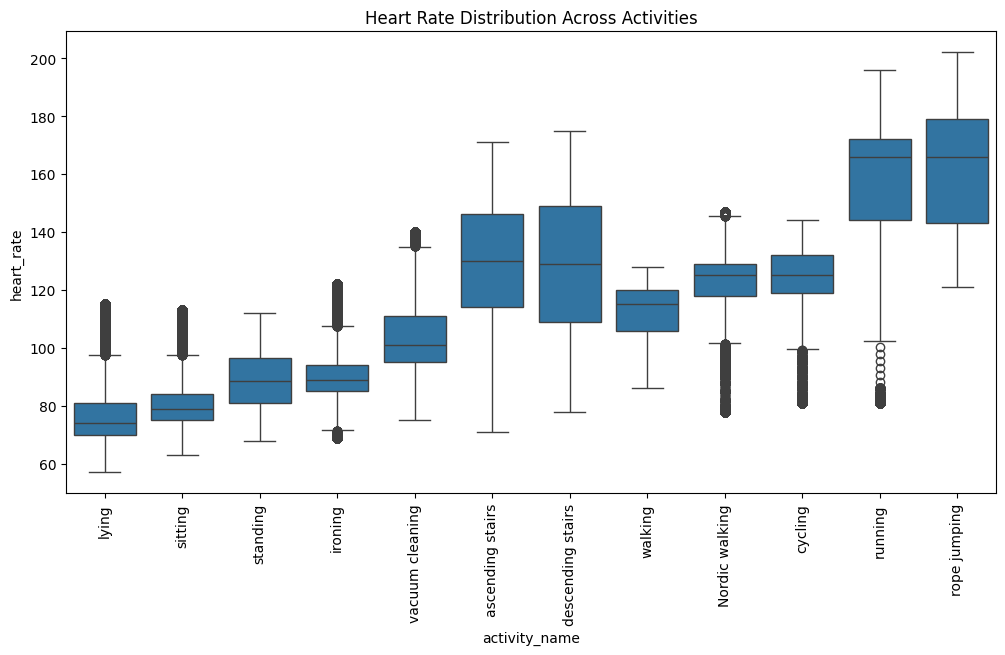

In [22]:
# Heart rate distribution by activity
plt.figure(figsize=(12, 6))
sns.boxplot(x='activity_name', y='heart_rate', data=data)
plt.title("Heart Rate Distribution Across Activities")
plt.xticks(rotation=90)
plt.show()

# **Feature Engineering**

In [23]:
def segment_data(data, window_size, step_size):
    segments, labels = [], []
    for i in range(0, len(data) - window_size, step_size):
        window = data.iloc[i:i + window_size]
        segments.append(window[sensor_columns].values)
        labels.append(window['activity_id'].mode()[0])  # Majority label
    return np.array(segments), np.array(labels)

# Segment parameters
WINDOW_SIZE = 100  # Adjust based on sampling rate (e.g., 100 samples ~ 1 sec)
STEP_SIZE = 50

X, y = segment_data(data, WINDOW_SIZE, STEP_SIZE)

In [24]:
from sklearn.model_selection import train_test_split

# Filter dataset to include only relevant activity IDs
valid_activities = list(activity_map.keys())  # Expected activity IDs
data = data[data['activity_id'].isin(valid_activities)]

# Re-split and preprocess the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [25]:
def extract_features(segment):
    features = []
    for i in range(segment.shape[1]):  # Iterate over each sensor axis
        features += [np.mean(segment[:, i]), np.std(segment[:, i]), np.min(segment[:, i]), np.max(segment[:, i])]
    return features

# Generate features and labels
X_train_features = np.array([extract_features(segment) for segment in X_train])
X_val_features = np.array([extract_features(segment) for segment in X_val])
X_test_features = np.array([extract_features(segment) for segment in X_test])

# **Methodology**

## **1. Random Forest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_features, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Validation Performance
y_val_pred = rf.predict(X_val_features)
rf_accuracy = accuracy_score(y_val, y_val_pred)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2789
           1       1.00      0.96      0.98       578
           2       1.00      0.97      0.99       555
           3       0.99      0.97      0.98       570
           4       0.99      0.97      0.98       716
           5       1.00      0.96      0.98       295
           6       1.00      0.95      0.97       494
           7       0.99      0.98      0.98       564
          12       0.96      0.90      0.93       351
          13       0.95      0.86      0.90       315
          16       0.96      0.94      0.95       526
          17       0.98      0.99      0.98       716
          24       1.00      0.89      0.94       148

    accuracy                           0.96      8617
   macro avg       0.98      0.95      0.96      8617
weighted avg       0.96      0.96      0.96      8617



## **2. XGBoost Classifier**

In [28]:
from sklearn.preprocessing import LabelEncoder

# Encode activity labels to sequential integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Check the mapping
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Label Mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 12: 8, 13: 9, 16: 10, 17: 11, 24: 12}


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train_features, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [30]:
# Evaluate XGBoost on validation data
y_val_pred_xgb = xgb.predict(X_val_features)
print("XGBoost Validation Performance:")
xgb_accuracy = accuracy_score(y_val, y_val_pred_xgb)
print(classification_report(y_val, y_val_pred_xgb))

XGBoost Validation Performance:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2789
           1       1.00      0.98      0.99       578
           2       0.99      0.98      0.99       555
           3       0.99      0.99      0.99       570
           4       1.00      0.98      0.99       716
           5       0.99      0.98      0.98       295
           6       0.99      0.96      0.97       494
           7       0.99      0.99      0.99       564
           8       0.97      0.91      0.94       351
           9       0.98      0.88      0.92       315
          10       0.98      0.98      0.98       526
          11       0.99      0.99      0.99       716
          12       1.00      0.95      0.97       148

    accuracy                           0.97      8617
   macro avg       0.99      0.96      0.97      8617
weighted avg       0.97      0.97      0.97      8617



## **3. CNN Model**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 64)              │           9,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 413,069 (1.58 MB)

 Trainable params: 413,069 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
cnn_history = cnn_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,
    batch_size=128
)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3948 - loss: 1.9252 - val_accuracy: 0.6055 - val_loss: 1.1063
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5883 - loss: 1.1950 - val_accuracy: 0.7149 - val_loss: 0.9012
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6397 - loss: 1.0378 - val_accuracy: 0.7188 - val_loss: 0.7985
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6754 - loss: 0.9440 - val_accuracy: 0.7577 - val_loss: 0.7442
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6928 - loss: 0.8899 - val_accuracy: 0.7706 - val_loss: 0.6823
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7143 - loss: 0.8337 - val_accuracy: 0.7555 - val_loss: 0.7124
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7163 - loss: 0.8262 - val_accuracy: 0.7760 - val_loss: 0.6557
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7253 - loss: 0.7977 - val_accuracy: 

In [33]:
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test_cat)
print(f"CNN Test Accuracy: {cnn_test_accuracy}")

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.4278
CNN Test Accuracy: 0.8556509613990784


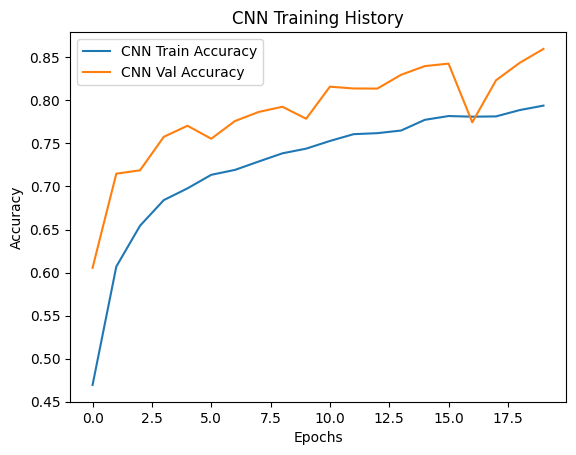

In [34]:
# Plot CNN accuracy
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.title('CNN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **4. RNN Model**

In [35]:
from tensorflow.keras.layers import SimpleRNN

# Define the RNN model
rnn_model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
rnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 100, 64)             │           7,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,677 (100.30 KB)

 Trainable params: 25,677 (100.30 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
rnn_history = rnn_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,
    batch_size=128
)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.3445 - loss: 2.1009 - val_accuracy: 0.5286 - val_loss: 1.3985
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5146 - loss: 1.4295 - val_accuracy: 0.6118 - val_loss: 1.1439
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5821 - loss: 1.2263 - val_accuracy: 0.6112 - val_loss: 1.1030
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5991 - loss: 1.1854 - val_accuracy: 0.6466 - val_loss: 1.0203
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6036 - loss: 1.1710 - val_accuracy: 0.6356 - val_loss: 1.0285
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6464 - loss: 1.0442 - val_accuracy: 0.6897 - val_loss: 0.8932
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6602 - loss: 1.0079 - val_accuracy: 0.6971 - val_loss: 0.8576
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6642 - loss: 0.9936 - val_acc

In [37]:
rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(X_test, y_test_cat)
print(f"RNN Test Accuracy: {rnn_test_accuracy}")

270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7182 - loss: 0.8183
RNN Test Accuracy: 0.7144349217414856


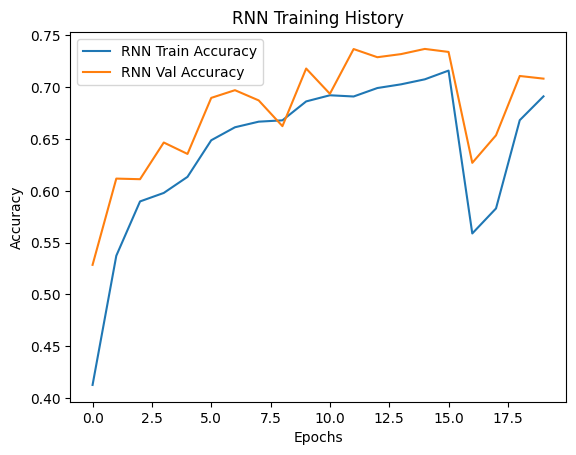

In [38]:
# Plot RNN accuracy
plt.plot(rnn_history.history['accuracy'], label='RNN Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Val Accuracy')
plt.title('RNN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **5. LSTM Model**

In [39]:
from tensorflow.keras.layers import LSTM

# Define LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 64)             │          29,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,717 (284.05 KB)

 Trainable params: 72,717 (284.05 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
lstm_history = lstm_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,
    batch_size=128
)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3449 - loss: 2.1453 - val_accuracy: 0.5426 - val_loss: 1.4139
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5236 - loss: 1.4142 - val_accuracy: 0.6248 - val_loss: 1.0864
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6271 - loss: 1.1324 - val_accuracy: 0.6658 - val_loss: 0.9755
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6150 - loss: 1.1612 - val_accuracy: 0.6697 - val_loss: 0.9415
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6671 - loss: 0.9994 - val_accuracy: 0.6812 - val_loss: 0.9358
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7078 - loss: 0.8813 - val_accuracy: 0.7324 - val_loss: 0.7840
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7171 - loss: 0.8363 - val_accuracy: 0.7385 - val_loss: 0.7464
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7250 - loss: 0.8256 - val_accu

In [41]:
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test_cat)
print(f"LSTM Test Accuracy: {lstm_test_accuracy}")

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8242 - loss: 0.5186
LSTM Test Accuracy: 0.8192155957221985


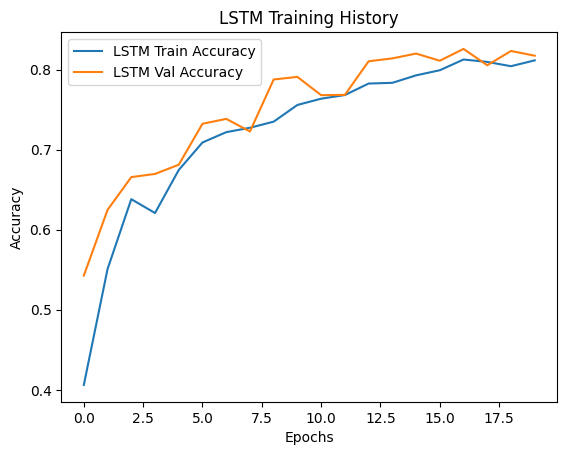

In [42]:
# Plot LSTM accuracy
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val Accuracy')
plt.title('LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **6. Hybrid CNN-LSTM Model**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout

# Define the CNN-LSTM hybrid model
cnn_lstm_model = Sequential([
    # CNN layers
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    # LSTM layers
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dropout(0.5),

    # Dense layers for classification
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
cnn_lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 98, 64)              │           9,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 49, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,901 (335.55 KB)

 Trainable params: 85,901 (335.55 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
cnn_lstm_history = cnn_lstm_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=20,
    batch_size=128
)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3546 - loss: 2.1353 - val_accuracy: 0.5380 - val_loss: 1.3618
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5183 - loss: 1.4227 - val_accuracy: 0.6340 - val_loss: 1.0660
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5950 - loss: 1.1909 - val_accuracy: 0.6876 - val_loss: 0.9394
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6548 - loss: 1.0242 - val_accuracy: 0.7127 - val_loss: 0.8369
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6728 - loss: 0.9736 - val_accuracy: 0.7072 - val_loss: 0.8471
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6957 - loss: 0.9073 - val_accuracy: 0.7101 - val_loss: 0.8493
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7039 - loss: 0.8762 - val_accuracy: 0.7432 - val_loss: 0.7372
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7200 - loss: 0.8367 - val_accuracy:

In [45]:
cnn_lstm_test_loss, cnn_lstm_test_accuracy = cnn_lstm_model.evaluate(X_test, y_test_cat)
print(f"CNN-LSTM Test Accuracy: {cnn_lstm_test_accuracy}")

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8383 - loss: 0.4809
CNN-LSTM Test Accuracy: 0.8391737937927246


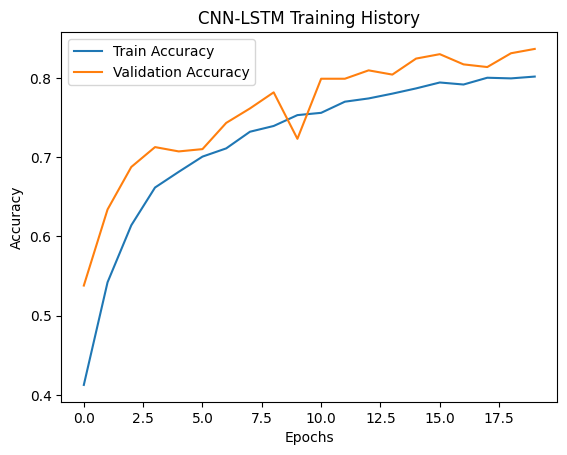

In [46]:
# Plot accuracy
plt.plot(cnn_lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN-LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
# Evaluate CNN
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test_cat)
print(f"CNN Test Accuracy: {cnn_test_accuracy}")
cnn_report = classification_report(np.argmax(y_test_cat, axis=1), np.argmax(cnn_model.predict(X_test), axis=1))
print("CNN Report:")
print(cnn_report)

270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8585 - loss: 0.4278
CNN Test Accuracy: 0.8556509613990784
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2789
           1       0.99      0.95      0.97       578
           2       0.98      0.95      0.96       556
           3       0.86      0.93      0.89       570
           4       0.80      0.90      0.84       716
           5       0.99      0.88      0.93       294
           6       0.95      0.95      0.95       494
           7       0.95      0.93      0.94       564
           8       0.80      0.46      0.58       352
           9       0.85      0.32      0.46       315
          10       0.83      0.74      0.78       526
          11       0.88      0.94      0.91       716
          12       0.98      0.80      0.88       148

    accuracy                           0.86      8618
   macro avg       0.8

In [48]:
# Evaluate RNN
rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(X_test, y_test_cat)
print(f"RNN Test Accuracy: {rnn_test_accuracy}")
rnn_report = classification_report(np.argmax(y_test_cat, axis=1), np.argmax(rnn_model.predict(X_test), axis=1))
print("RNN Report:")
print(rnn_report)

270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7182 - loss: 0.8183
RNN Test Accuracy: 0.7144349217414856
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
RNN Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      2789
           1       1.00      0.95      0.97       578
           2       0.95      0.94      0.95       556
           3       0.85      0.73      0.78       570
           4       0.68      0.67      0.68       716
           5       0.00      0.00      0.00       294
           6       0.82      0.94      0.88       494
           7       0.58      0.77      0.66       564
           8       0.47      0.48      0.47       352
           9       0.26      0.02      0.04       315
          10       0.63      0.83      0.72       526
          11       0.67      0.94      0.78       716
          12       0.68      0.43      0.52       148

    accuracy                           0.71      8618
   macro avg       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# Evaluate LSTM
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test_cat)
print(f"LSTM Test Accuracy: {lstm_test_accuracy}")
lstm_report = classification_report(np.argmax(y_test_cat, axis=1), np.argmax(lstm_model.predict(X_test), axis=1))
print("LSTM Report:")
print(lstm_report)

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8242 - loss: 0.5186
LSTM Test Accuracy: 0.8192155957221985
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LSTM Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2789
           1       1.00      0.95      0.97       578
           2       0.94      0.96      0.95       556
           3       0.83      0.93      0.88       570
           4       0.82      0.86      0.84       716
           5       0.76      0.82      0.79       294
           6       0.88      0.95      0.92       494
           7       0.85      0.94      0.89       564
           8       0.52      0.60      0.56       352
           9       0.75      0.04      0.07       315
          10       0.70      0.87      0.78       526
          11       0.89      0.95      0.92       716
          12       0.72      0.74      0.73       148

    accuracy                           0.82      8618
   macro avg       0

In [50]:
# Evaluate CNN-LSTM
cnn_lstm_test_loss, cnn_lstm_test_accuracy = cnn_lstm_model.evaluate(X_test, y_test_cat)
print(f"CNN-LSTM Test Accuracy: {cnn_lstm_test_accuracy}")
cnn_lstm_report = classification_report(np.argmax(y_test_cat, axis=1), np.argmax(cnn_lstm_model.predict(X_test), axis=1))
print("CNN-LSTM Report:")
print(cnn_lstm_report)

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8383 - loss: 0.4809
CNN-LSTM Test Accuracy: 0.8391737937927246
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN-LSTM Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      2789
           1       1.00      0.95      0.97       578
           2       0.96      0.96      0.96       556
           3       0.88      0.94      0.90       570
           4       0.72      0.91      0.81       716
           5       0.95      0.88      0.91       294
           6       0.98      0.91      0.95       494
           7       0.90      0.92      0.91       564
           8       0.75      0.34      0.47       352
           9       0.21      0.02      0.04       315
          10       0.89      0.73      0.80       526
          11       0.90      0.93      0.91       716
          12       0.85      0.86      0.86       148

    accuracy                           0.84      8618
   macro avg

# **Comparision of models performance**

In [51]:
# Consolidate Accuracy
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'CNN', 'RNN', 'LSTM', 'CNN-LSTM'],
    'Accuracy': [
        rf_accuracy,
        xgb_accuracy,
        cnn_test_accuracy,
        rnn_test_accuracy,
        lstm_test_accuracy,
        cnn_lstm_test_accuracy
    ]
})

# Display Results
print("Model Performance Comparison:")
print(results)

Model Performance Comparison:
           Model  Accuracy
0  Random Forest  0.962052
1        XGBoost  0.974353
2            CNN  0.855651
3            RNN  0.714435
4           LSTM  0.819216
5       CNN-LSTM  0.839174


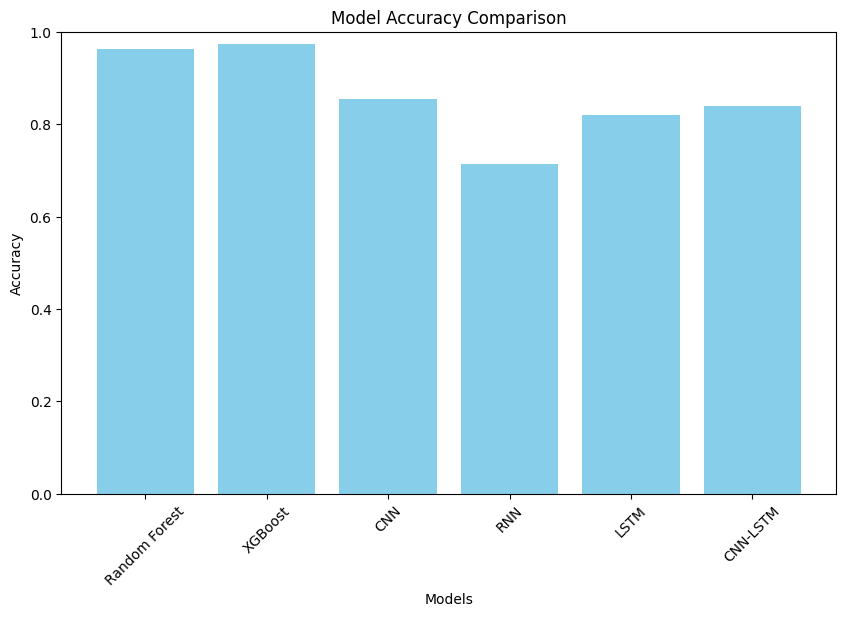

In [52]:
# Bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Accuracy'], color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()